In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from regressors import stats

In [2]:
df = pd.read_excel("fragile_state_index.xlsx", header=[0])
#pd.read_excel("/tmp/sample.xlsx", usecols = "B:F", skiprows=[0])

In [3]:
    dictionary = {"key1": "value1"}
print(dictionary["key1"])

value1


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

Unnamed: 0                            int64
Country                              object
Year                                  int64
Rank                                 object
Total                               float64
C1: Security Apparatus              float64
C2: Factionalized Elites            float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object


In [5]:
df

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,0,Sudan,2006,1st,112.300000,9.8,9.1,9.7,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,1,Congo Democratic Republic,2006,2nd,110.100000,9.8,9.6,9.1,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,2,Cote d'Ivoire,2006,3rd,109.200000,9.8,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,3,Iraq,2006,4th,109.000000,9.8,9.7,9.8,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,4,Zimbabwe,2006,5th,108.900000,9.4,8.5,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2628,Iceland,2020,174th,17.800000,1.0,1.8,0.7,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
2629,2629,Denmark,2020,175th,17.213587,1.6,1.4,4.0,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
2630,2630,Switzerland,2020,176th,17.094086,1.4,1.0,3.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
2631,2631,Norway,2020,177th,16.191210,1.8,1.1,3.6,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [6]:
# Create dummy variables for the category_columns and merge on the numeric_columns to create an X dataset
# Define target data
# Create category_columns and numeric_columns variables
X = df.drop(['Country', 'Rank','Year','Total', 'C2: Factionalized Elites'], axis=1)
X 

,Unnamed: 0,C1: Security Apparatus,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,0,9.8,9.7,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,1,9.8,9.1,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,2,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,3,9.8,9.8,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,4,9.4,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2628,1.0,0.7,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
2629,2629,1.6,4.0,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
2630,2630,1.4,3.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
2631,2631,1.8,3.6,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [7]:
# Fill in missing values in X with zeroes
X = X.fillna(0)
y = df['C2: Factionalized Elites']

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Unnamed: 0                          True
C1: Security Apparatus              True
C3: Group Grievance                 True
E1: Economy                         True
E2: Economic Inequality             True
E3: Human Flight and Brain Drain    True
P1: State Legitimacy                True
P2: Public Services                 True
P3: Human Rights                    True
S1: Demographic Pressures           True
S2: Refugees and IDPs               True
X1: External Intervention           True
Change from Previous Year           True
dtype: bool

In [10]:
X.dtypes

Unnamed: 0                            int64
C1: Security Apparatus              float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train.head()

,Unnamed: 0,C1: Security Apparatus,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
2217,2217,4.9,3.7,4.008167,5.1000,4.900000,7.58215,4.400000,7.200000,5.600000,3.7,4.800000,0.0000
718,718,5.0,8.5,7.000000,7.2000,7.000000,7.50000,7.400000,7.500000,9.100000,7.0,7.500000,0.0000
2143,2143,8.5,4.2,6.600000,7.9000,7.475282,6.80000,8.400000,5.948356,8.800000,6.3,7.800000,0.0000
2271,2271,2.4,1.1,3.100000,1.9000,2.565197,0.70000,1.441696,1.700000,1.532412,1.7,1.100000,0.0000
2537,2537,5.0,4.2,7.900000,5.7035,8.200000,4.70000,5.600000,2.956628,6.393654,5.1,8.228119,-0.8181


In [14]:
nn_model = tf.keras.models.Sequential()

In [15]:
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [16]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [17]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                364       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 27        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [19]:
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
62/62 [==============================] - 0s 499us/step - loss: 37.3301
Epoch 2/100
62/62 [==============================] - 0s 576us/step - loss: 21.0715
Epoch 3/100
62/62 [==============================] - 0s 579us/step - loss: 9.1834
Epoch 4/100
62/62 [==============================] - 0s 660us/step - loss: 3.0301
Epoch 5/100
62/62 [==============================] - 0s 708us/step - loss: 1.4961
Epoch 6/100
62/62 [==============================] - 0s 724us/step - loss: 1.3329
Epoch 7/100
62/62 [==============================] - 0s 742us/step - loss: 1.3181
Epoch 8/100
62/62 [==============================] - 0s 562us/step - loss: 1.3084
Epoch 9/100
62/62 [==============================] - 0s 547us/step - loss: 1.2987
Epoch 10/100
62/62 [==============================] - 0s 595us/step - loss: 1.2881
Epoch 11/100
62/62 [==============================] - 0s 579us/step - loss: 1.2757
Epoch 12/100
62/62 [==============================] - 0s 643us/step - loss: 1.2595
Epoch 13/10

In [20]:
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [21]:
r2_score(y_train, y_train_pred)

0.8830093710951394

In [22]:
r2_score(y_test, y_test_pred)

0.8838156829694555

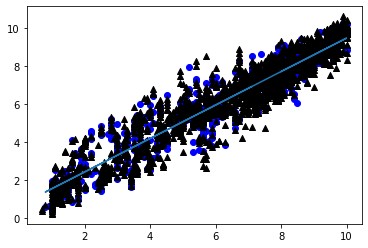

In [23]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [24]:
deep_model = tf.keras.models.Sequential()

In [25]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu', input_dim = len(X.columns)))

In [26]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu'))

In [27]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [28]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [29]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 27        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 1,095
Trainable params: 1,095
Non-trainable params: 0
_________________________________________________________________


In [30]:
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [31]:
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
62/62 [==============================] - 0s 740us/step - loss: 31.1037
Epoch 2/100
62/62 [==============================] - 0s 676us/step - loss: 3.4047
Epoch 3/100
62/62 [==============================] - 0s 772us/step - loss: 1.3230
Epoch 4/100
62/62 [==============================] - 0s 692us/step - loss: 1.0512
Epoch 5/100
62/62 [==============================] - 0s 788us/step - loss: 0.9289
Epoch 6/100
62/62 [==============================] - 0s 965us/step - loss: 0.8657
Epoch 7/100
62/62 [==============================] - 0s 725us/step - loss: 0.8320
Epoch 8/100
62/62 [==============================] - 0s 772us/step - loss: 0.8108
Epoch 9/100
62/62 [==============================] - 0s 880us/step - loss: 0.8119
Epoch 10/100
62/62 [==============================] - 0s 885us/step - loss: 0.7868
Epoch 11/100
62/62 [==============================] - 0s 724us/step - loss: 0.7798
Epoch 12/100
62/62 [==============================] - 0s 718us/step - loss: 0.7786
Epoch 13/100

In [32]:
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [33]:
r2_score(y_train, y_train_pred)

0.9052892377743572

In [34]:
r2_score(y_test, y_test_pred)

0.8961708081110418

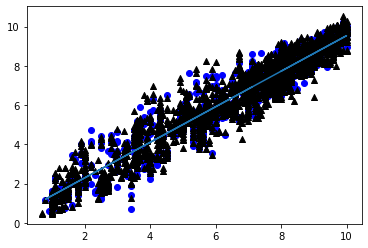

In [35]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
model.score(X_train_scaled, y_train)

0.8729664400390504

In [39]:
model.score(X_test_scaled, y_test)

0.8769996942214654

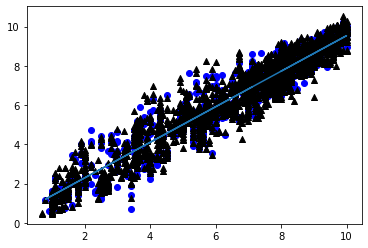

In [40]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [41]:
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [42]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_train, y_train))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_train, y_train, X.columns)

coef_pval:
 [7.55854776e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.06569770e-01 7.19098292e-01 1.88318002e-03 0.00000000e+00
 1.02744957e-01 2.34747752e-01 5.06650257e-01 7.63183174e-04
 1.31006317e-14 1.28287393e-05]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q    Max
-3.0312 -0.5616 -0.0606  0.4948  2.821


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                       -0.497364    0.100226  -4.9624  0.000001
Unnamed: 0                        0.000318    0.000013  24.4335  0.000000
C1: Security Apparatus            0.176637    0.019396   9.1070  0.000000
C3: Group Grievance               0.264243    0.015601  16.9374  0.000000
E1: Economy                       0.002228    0.018979   0.1174  0.906570
E2: Economic Inequality           0.006778    0.018843   0.3597  0.719098
E3: Human Flight and Brain Drain -0.050533    0.016237  -3.1123  0.001883
P1: State Legitimacy              0.508220 

In [43]:
ols = linear_model.LinearRegression()
ols.fit(X_test, y_test)

LinearRegression()

In [44]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_test, y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_test, y_test, X.columns)

coef_pval:
 [9.81461807e-05 0.00000000e+00 3.70142723e-05 0.00000000e+00
 3.72530184e-01 3.41127647e-01 7.10311994e-01 0.00000000e+00
 5.98631744e-03 9.16487440e-01 7.10421749e-01 7.03979751e-03
 5.27508548e-09 7.89836306e-03]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-2.5731 -0.5945 -0.0278  0.4958  2.7444


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                       -0.660048    0.168414  -3.9192  0.000098
Unnamed: 0                        0.000292    0.000022  13.0652  0.000000
C1: Security Apparatus            0.141081    0.033964   4.1538  0.000037
C3: Group Grievance               0.272738    0.026998  10.1022  0.000000
E1: Economy                       0.029045    0.032549   0.8924  0.372530
E2: Economic Inequality           0.031648    0.033222   0.9526  0.341128
E3: Human Flight and Brain Drain -0.010944    0.029451  -0.3716  0.710312
P1: State Legitimacy              0.51994